In [ ]:
!pip install git+https://github.com/qiskit-community/Quantum-Korea-Hackathon-2024.git

In [2]:
import numpy as np
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qkh2024.grader import transpile_scoring

In [3]:
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")

In [4]:
transpiler_list = []
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=1, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=2, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=3, 
))
transpiler_list.append(TranspilerService(
    backend_name="ibm_sherbrooke", 
    ai="true", 
    optimization_level=3, 
))

In [10]:
tr_depths = [[], [], [], []]
tr_gate_counts = [[], [], [], []]
tr_cnot_counts = [[], [], [], []]
tr_scores = [[], [], [], []]

In [11]:
# Transpile and collect result stats
num_qubits = np.arange(2, 13)

for nq in num_qubits:
    print(f'Start transpiling the {nq}-qubit circuit')
    circuit = QFT(nq, do_swaps=False).decompose()
    for i in range(4):
        isa_circuit = transpiler_list[i].run(circuit)
        tr_depths[i].append(isa_circuit.depth())
        tr_gate_counts[i].append(sum(isa_circuit.count_ops().values()))
        tr_cnot_counts[i].append(isa_circuit.num_nonlocal_gates())
        tr_scores[i].append(transpile_scoring(isa_circuit, None, backend))

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 2-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 3-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 4-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 5-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 6-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 7-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 8-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 9-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 10-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 11-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 12-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


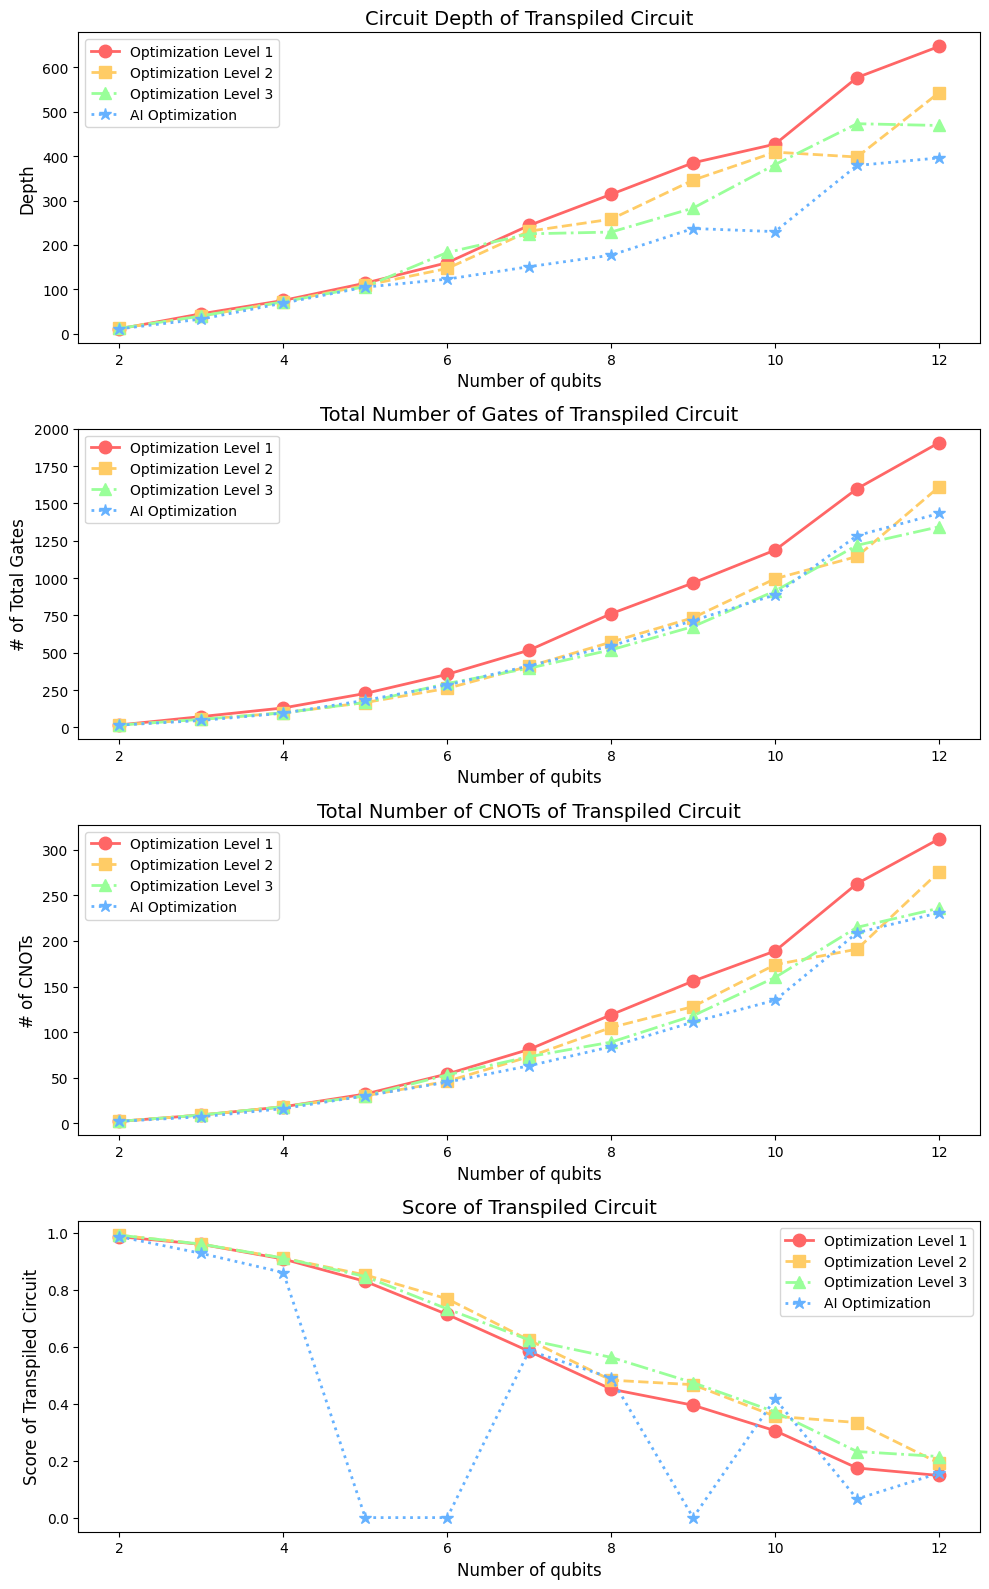

In [29]:
import matplotlib.pyplot as plt

ax = num_qubits
opt_list = ['Optimization Level 1', 'Optimization Level 2', 'Optimization Level 3', 'AI Optimization']
markers = ['o', 's', '^', '*']
linestyles = ['-', '--', '-.', ':']
colors = ['#FF6666', '#FFCC66', '#99FF99', '#66B2FF']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16))

# Plot 1: Circuit Depth
for i in range(4):
    ax1.plot(ax, tr_depths[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax1.set_xlabel("Number of qubits", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(4):
    ax2.plot(ax, tr_gate_counts[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("Number of qubits", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Total Number of CNOTs
for i in range(4):
    ax3.plot(ax, tr_cnot_counts[i], label=opt_list[i], marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("Number of qubits", fontsize=12)
ax3.set_ylabel("# of CNOTs", fontsize=12)
ax3.set_title("Total Number of CNOTs of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

# Plot 4: Score of Transpiled Circuit
for i in range(4):
    ax4.plot(ax, tr_scores[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax4.set_xlabel("Number of qubits", fontsize=12)
ax4.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax4.set_title("Score of Transpiled Circuit", fontsize=14)
ax4.legend(fontsize=10)

fig.tight_layout()
plt.show()

In [ ]:
# Transpile and collect result stats
num_qubits = np.arange(13, 16)

for nq in num_qubits:
    print(f'Start transpiling the {nq}-qubit circuit')
    circuit = QFT(nq, do_swaps=False).decompose()
    i = 3
    isa_circuit = transpiler_list[i].run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 13-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 14-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 15-qubit circuit


ERROR:qiskit_transpiler_service.wrappers.base:The request FAILED
ERROR:qiskit_transpiler_service.wrappers.base:Failed to get a result for transpile: The background task 4a56dbdb-e8a7-4d15-bcf1-d678d67ec350 FAILED
ERROR:qiskit_transpiler_service.wrappers.base:Service error.


TranspilerError: 'Service error.'

In [ ]:
import numpy as np
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qkh2024.grader import transpile_scoring

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")

In [ ]:
transpiler_list = []
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=1, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=2, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=3, 
))
transpiler_list.append(TranspilerService(
    backend_name="ibm_sherbrooke", 
    ai="true", 
    optimization_level=3, 
))

In [ ]:
tr_depths = [[], [], [], []]
tr_gate_counts = [[], [], [], []]
tr_cnot_counts = [[], [], [], []]
tr_scores = [[], [], [], []]

In [ ]:
# Transpile and collect result stats
num_qubits = np.arange(2, 13)

for nq in num_qubits:
    print(f'Start transpiling the {nq}-qubit circuit')
    circuit = QFT(nq, do_swaps=False).decompose()
    for i in range(4):
        isa_circuit = transpiler_list[i].run(circuit)
        tr_depths[i].append(isa_circuit.depth())
        tr_gate_counts[i].append(sum(isa_circuit.count_ops().values()))
        tr_cnot_counts[i].append(isa_circuit.num_nonlocal_gates())
        tr_scores[i].append(transpile_scoring(isa_circuit, None, backend))

In [ ]:
import matplotlib.pyplot as plt

ax = num_qubits
opt_list = ['Optimization Level 1', 'Optimization Level 2', 'Optimization Level 3', 'AI Optimization']
markers = ['o', 's', '^', '*']
linestyles = ['-', '--', '-.', ':']
colors = ['#FF6666', '#FFCC66', '#99FF99', '#66B2FF']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16))

# Plot 1: Circuit Depth
for i in range(4):
    ax1.plot(ax, tr_depths[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax1.set_xlabel("Number of qubits", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(4):
    ax2.plot(ax, tr_gate_counts[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("Number of qubits", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Total Number of CNOTs
for i in range(4):
    ax3.plot(ax, tr_cnot_counts[i], label=opt_list[i], marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("Number of qubits", fontsize=12)
ax3.set_ylabel("# of CNOTs", fontsize=12)
ax3.set_title("Total Number of CNOTs of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

# Plot 4: Score of Transpiled Circuit
for i in range(4):
    ax4.plot(ax, tr_scores[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax4.set_xlabel("Number of qubits", fontsize=12)
ax4.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax4.set_title("Score of Transpiled Circuit", fontsize=14)
ax4.legend(fontsize=10)

fig.tight_layout()
plt.show()